In [1]:
!pip install opacus

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.4/254.4 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 93.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 73.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 29.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 2.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 65.8 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: 

✅ Opacus détecté via RDPAccountant (1.5.4+ API)
Taille TRAIN complet: 5232
Taille TEST: 624
Classes: ['NORMAL', 'PNEUMONIA']
Déséquilibre des classes: [1349 3883]
Ratio: 2.88:1 (PNEUMONIA:NORMAL)
Partitionnement des données sur 20 clients...
Distribution des classes: [1349 3883]
✅ Partitionnement réussi:
   Taille min: 56, max: 706, moyenne: 261.6
   Client 0: 233 échantillons, distribution: [ 47 186]
   Client 1: 530 échantillons, distribution: [ 67 463]
   Client 2: 358 échantillons, distribution: [ 61 297]

🎯 Configuration finale:
   Clients actifs: 20
   Clients par round: 20


Downloading: "https://download.pytorch.org/models/efficientnet_b4_rwightman-23ab8bcd.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b4_rwightman-23ab8bcd.pth
100%|██████████| 74.5M/74.5M [00:00<00:00, 180MB/s]


✅ EfficientNet-B4 optimisé chargé
📊 Paramètres entraînables: 17,282,840/17,552,202 (98.5%)
Recherche du multiplicateur de bruit optimal pour ε=8.0, δ=1e-05...
  noise_mult=0.5 -> ε=294.86
  noise_mult=1.0 -> ε=96.12
  noise_mult=1.5 -> ε=52.58
  noise_mult=2.0 -> ε=35.08
  noise_mult=2.5 -> ε=25.93
⚠️ Utilisation du multiplicateur de bruit par défaut: 1.5
🔒 Paramètres de privacy OPTIMISÉS:
   - Multiplicateur de bruit: 1.50
   - Sigma individuel: 3.0000
   - Sigma commun: 0.6000

🚀 Démarrage de l'entraînement fédéré OPTIMISÉ...
📊 Précision initiale du test: 37.02%

=== Round fédéré 1/100 ===
Round 1: Précision = 62.50%, Clip = 1.9940, Bits Moyens = 6.0, ε = 2.98480004524568
🎯 Nouvelle meilleure précision: 62.50%

=== Round fédéré 2/100 ===
Round 2: Précision = 80.13%, Clip = 1.9880, Bits Moyens = 6.0, ε = 4.419676324683251
🎯 Nouvelle meilleure précision: 80.13%

=== Round fédéré 3/100 ===
Round 3: Précision = 86.22%, Clip = 1.9821, Bits Moyens = 6.0, ε = 5.582943978750724
🎯 Nouvelle me

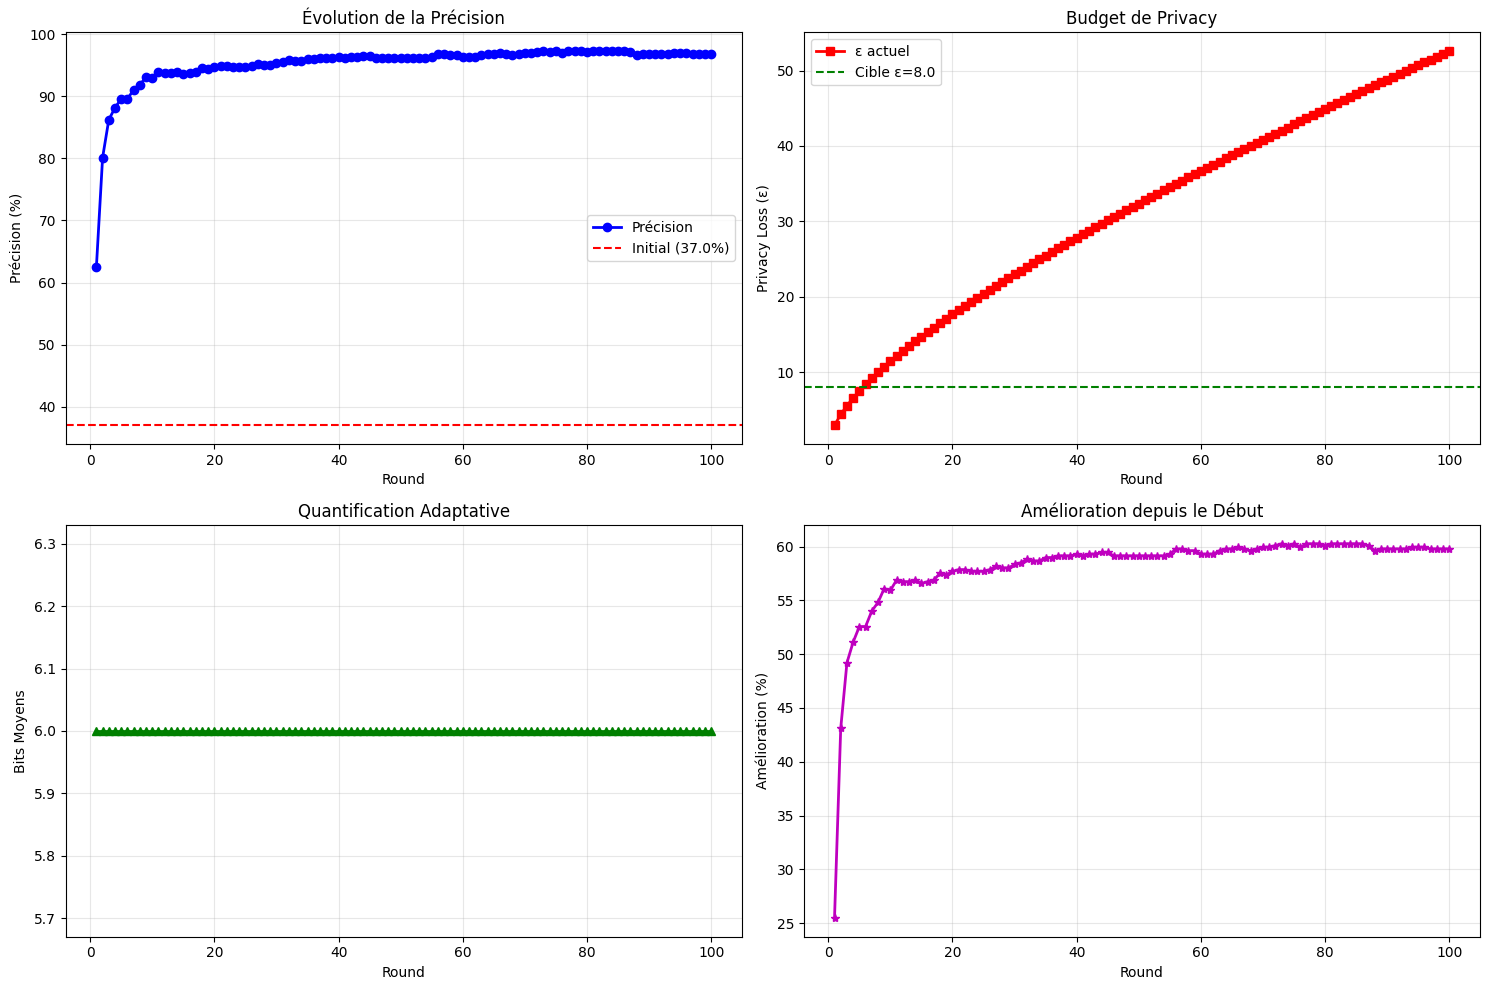


🎉 RAPPORT FINAL - ANCCO-FL OPTIMISÉ
📊 PERFORMANCE:
   • Précision Initiale: 37.02%
   • Précision Finale: 96.79%
   • Meilleure Précision: 97.28%
   • Amélioration: +59.78%
   • Rounds Effectués: 100

🔒 PRIVACY:
   • ε Final: 52.57947060264553
   • δ: 1e-05
   • Budget Respecté: False

⚡ EFFICACITÉ:
   • Bits Moyens: 6.0
   • Clip Final: 1.4810
   • Bruit Final: σ_ind=3.0000
💾 Modèle optimisé sauvegardé: 'ancco_fl_optimise_final.pth'


In [2]:
# ==============================================================
# ANCCO-FL - OPTIMISATION POUR RELANCER L'APPRENTISSAGE
# (Version: 100 rounds, 20 clients per round, no early stop)
# ==============================================================

import os, copy, math, random, time, sys
from typing import Dict, List, Tuple
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Subset
import matplotlib.pyplot as plt

# ==============================================================
# ✅ Opacus import
# ==============================================================
USE_OPACUS = True

try:
    from opacus.accountants import RDPAccountant
    print("✅ Opacus détecté via RDPAccountant (1.5.4+ API)")
except Exception as e:
    print(f"⚠️ Opacus import échoué: {e}")
    USE_OPACUS = False

# ==============================================================
# CONFIGURATION OPTIMISÉE (MODIFIÉES POUR 100 ROUNDS & 20 CLIENTS)
# ==============================================================
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
DATA_DIR = "/kaggle/input/labeled-chest-xray-images/chest_xray"
BATCH_SIZE = 16
GLOBAL_EPOCHS = 100  # <-- changed: run 100 federated rounds
num_clients = 20
local_epochs = 2
LR = 5e-4
seed_global = 42
torch.manual_seed(seed_global)
np.random.seed(seed_global)
random.seed(seed_global)

# Paramètres ANCCO-FL OPTIMISÉS
max_bits = 8
min_bits = 4
entropy_scaling = 0.05
clip_initial = 2.0
clip_decay = 0.997
server_lr = 0.3
sigma_common = 0.1
sigma_individual = 0.1
TARGET_EPS = 8.0
TARGET_DELTA = 1e-5
CLIENTS_PER_ROUND = 20   # <-- changed: use all 20 clients per round
ENABLE_QUANT = ENABLE_NOISE = ENABLE_CANCELLATION = True
ENABLE_PRIVACY_ACCOUNTING = USE_OPACUS and (TARGET_EPS is not None)
DIRICHLET_ALPHA = 1.0
eps = 1e-12

# ==============================================================
# CHARGEMENT DES DONNÉES AVEC AUGMENTATION AMÉLIORÉE
# ==============================================================
train_tf = transforms.Compose([
    transforms.Resize((380, 380)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(degrees=15),
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1), scale=(0.9, 1.1)),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

test_tf = transforms.Compose([
    transforms.Resize((380, 380)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

train_dataset = datasets.ImageFolder(os.path.join(DATA_DIR, 'train'), transform=train_tf)
test_dataset = datasets.ImageFolder(os.path.join(DATA_DIR, 'test'), transform=test_tf)
print(f"Taille TRAIN complet: {len(train_dataset)}")
print(f"Taille TEST: {len(test_dataset)}")
print(f"Classes: {train_dataset.classes}")

# Analyser le déséquilibre des classes
train_labels = [label for _, label in train_dataset.samples]
class_counts = np.bincount(train_labels)
print(f"Déséquilibre des classes: {class_counts}")
print(f"Ratio: {class_counts[1]/class_counts[0]:.2f}:1 (PNEUMONIA:NORMAL)")

# ==============================================================
# PARTITIONNEMENT AVEC ÉQUILIBRAGE (Dirichlet)
# ==============================================================
def make_balanced_dirichlet_partitions(dataset, num_clients, alpha=1.0, seed=42, min_samples_per_client=30):
    np.random.seed(seed)
    labels = np.array([y for (_, y) in dataset.samples])
    num_classes = len(np.unique(labels))
    
    print(f"Partitionnement des données sur {num_clients} clients...")
    print(f"Distribution des classes: {np.bincount(labels)}")
    
    client_indices = [[] for _ in range(num_clients)]
    
    for class_id in range(num_classes):
        class_indices = np.where(labels == class_id)[0]
        np.random.shuffle(class_indices)
        
        if len(class_indices) == 0:
            continue
            
        proportions = np.random.dirichlet([alpha] * num_clients)
        min_prop = min_samples_per_client / len(class_indices)
        proportions = np.maximum(proportions, min_prop)
        proportions = proportions / proportions.sum()
        
        counts = (proportions * len(class_indices)).astype(int)
        total_assigned = counts.sum()
        
        while total_assigned < len(class_indices):
            deficit = len(class_indices) - total_assigned
            sorted_indices = np.argsort(proportions)[::-1]
            for i in range(min(deficit, num_clients)):
                counts[sorted_indices[i]] += 1
            total_assigned = counts.sum()
            
        while total_assigned > len(class_indices):
            counts[np.argmax(counts)] -= 1
            total_assigned = counts.sum()
        
        start_idx = 0
        for client_id in range(num_clients):
            end_idx = start_idx + counts[client_id]
            client_indices[client_id].extend(class_indices[start_idx:end_idx])
            start_idx = end_idx
    
    # Vérification et équilibrage minimal
    for client_id in range(num_clients):
        if len(client_indices[client_id]) < min_samples_per_client:
            for donor_id in range(num_clients):
                if len(client_indices[donor_id]) > min_samples_per_client + 15:
                    transfer_count = min(10, len(client_indices[donor_id]) - min_samples_per_client - 10)
                    transfer_indices = client_indices[donor_id][-transfer_count:]
                    client_indices[client_id].extend(transfer_indices)
                    client_indices[donor_id] = client_indices[donor_id][:-transfer_count]
                    break
    
    client_sizes = [len(indices) for indices in client_indices]
    print(f"✅ Partitionnement réussi:")
    print(f"   Taille min: {min(client_sizes)}, max: {max(client_sizes)}, moyenne: {np.mean(client_sizes):.1f}")
    
    for i in range(min(3, num_clients)):
        client_labels = [labels[idx] for idx in client_indices[i]]
        print(f"   Client {i}: {len(client_labels)} échantillons, distribution: {np.bincount(client_labels)}")
    
    return client_indices

client_indices = make_balanced_dirichlet_partitions(
    train_dataset, num_clients, alpha=DIRICHLET_ALPHA, seed=seed_global, min_samples_per_client=30
)

client_loaders = []
for i, indices in enumerate(client_indices):
    if len(indices) > 0:
        subset = Subset(train_dataset, indices)
        loader = DataLoader(subset, batch_size=BATCH_SIZE, shuffle=True, drop_last=True)
        client_loaders.append(loader)

test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

# Update num_clients and clamp CLIENTS_PER_ROUND
num_clients = len(client_loaders)
CLIENTS_PER_ROUND = min(CLIENTS_PER_ROUND, num_clients)

print(f"\n🎯 Configuration finale:")
print(f"   Clients actifs: {num_clients}")
print(f"   Clients par round: {CLIENTS_PER_ROUND}")

# ==============================================================
# MODÈLE AVEC FINE-TUNING STRATÉGIQUE (EfficientNet-B4)
# ==============================================================
from torchvision.models import efficientnet_b4, EfficientNet_B4_Weights

class EfficientNetB4Optimized(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.backbone = efficientnet_b4(weights=EfficientNet_B4_Weights.IMAGENET1K_V1)
        
        # Freeze early layers
        for param in self.backbone.parameters():
            param.requires_grad = False
            
        # Unfreeze last feature blocks and classifier
        for param in self.backbone.features[-5:].parameters():
            param.requires_grad = True
        for param in self.backbone.classifier.parameters():
            param.requires_grad = True
        
        in_features = self.backbone.classifier[1].in_features
        self.backbone.classifier[1] = nn.Linear(in_features, num_classes)
        
        nn.init.xavier_uniform_(self.backbone.classifier[1].weight)
        if self.backbone.classifier[1].bias is not None:
            nn.init.zeros_(self.backbone.classifier[1].bias)
        
    def forward(self, x):
        return self.backbone(x)

try:
    global_model = EfficientNetB4Optimized(len(train_dataset.classes)).to(DEVICE)
    print("✅ EfficientNet-B4 optimisé chargé")
    trainable_params = sum(p.numel() for p in global_model.parameters() if p.requires_grad)
    total_params = sum(p.numel() for p in global_model.parameters())
    print(f"📊 Paramètres entraînables: {trainable_params:,}/{total_params:,} ({trainable_params/total_params:.1%})")
except Exception as e:
    print(f"⚠️ EfficientNet-B4 non disponible: {e}")
    from torchvision.models import resnet18, ResNet18_Weights
    class ResNet18Optimized(nn.Module):
        def __init__(self, num_classes):
            super().__init__()
            self.backbone = resnet18(weights=ResNet18_Weights.IMAGENET1K_V1)
            self.backbone.fc = nn.Linear(self.backbone.fc.in_features, num_classes)
        def forward(self, x):
            return self.backbone(x)
    global_model = ResNet18Optimized(len(train_dataset.classes)).to(DEVICE)
    print("✅ ResNet-18 utilisé comme fallback")

# ==============================================================
# FONCTIONS UTILITAIRES
# ==============================================================
def is_trainable_param(tensor):
    return tensor.dtype in [torch.float32, torch.float64, torch.float16]

def state_dict_to_cpu(sd): 
    return {k: v.detach().cpu().clone() for k, v in sd.items()}

def model_state_diff(global_sd, local_sd):
    diff = {}
    for k in global_sd:
        if k in local_sd and is_trainable_param(global_sd[k]):
            if global_sd[k].dtype != local_sd[k].dtype:
                local_val = local_sd[k].to(global_sd[k].dtype)
            else:
                local_val = local_sd[k]
            diff[k] = (local_val - global_sd[k]).clone()
    return diff

def flatten_state_dict(sd):
    parts = []
    shapes = {}
    for k, v in sd.items():
        if v.numel() > 0 and is_trainable_param(v) and v.requires_grad:
            shapes[k] = v.shape
            parts.append(v.reshape(-1))
    if not parts:
        return torch.tensor([]), shapes
    return torch.cat(parts), shapes

def unflatten_to_state_dict(flat_tensor, shapes):
    state_dict = {}
    start_idx = 0
    for key, shape in shapes.items():
        num_elements = int(np.prod(shape))
        end_idx = start_idx + num_elements
        if end_idx <= len(flat_tensor):
            state_dict[key] = flat_tensor[start_idx:end_idx].reshape(shape)
        else:
            remaining = len(flat_tensor) - start_idx
            if remaining > 0:
                state_dict[key] = flat_tensor[start_idx:].reshape(shape)
            else:
                state_dict[key] = torch.zeros(shape, dtype=flat_tensor.dtype)
        start_idx = end_idx
    return state_dict

def clip_state(sd, C):
    flat, shapes = flatten_state_dict(sd)
    if flat.numel() == 0:
        return sd, 0.0
    norm = torch.norm(flat, p=2).item()
    if norm <= C or norm == 0:
        return sd, norm
    scaling_factor = C / norm
    flat_clipped = flat * scaling_factor
    clipped_sd = sd.copy()
    reconstructed = unflatten_to_state_dict(flat_clipped, shapes)
    for k in reconstructed:
        if k in clipped_sd:
            clipped_sd[k] = reconstructed[k]
    return clipped_sd, norm

def compute_entropy(sd):
    flat, _ = flatten_state_dict(sd)
    if flat.numel() == 0:
        return 0.0
    abs_vals = torch.abs(flat).double()
    total = abs_vals.sum().item()
    if total == 0:
        return 0.0
    probabilities = abs_vals / total
    probabilities_np = probabilities.numpy()
    non_zero_probs = probabilities_np[probabilities_np > 0]
    if len(non_zero_probs) == 0:
        return 0.0
    entropy = -np.sum(non_zero_probs * np.log(non_zero_probs + eps))
    max_entropy = np.log(len(flat) + eps)
    return float(entropy / max_entropy)

def adaptive_bits(ent):
    x = np.clip(ent / entropy_scaling, -5, 5)
    sigmoid = 1 / (1 + np.exp(-x))
    bits = min_bits + sigmoid * (max_bits - min_bits)
    return int(np.round(bits))

def quantize_state(sd, bits):
    if bits >= 16:
        return {k: v.clone() for k, v in sd.items()}
    quantized = {}
    for k, v in sd.items():
        if not is_trainable_param(v):
            quantized[k] = v.clone()
            continue
        abs_max = torch.max(torch.abs(v)).item()
        if abs_max == 0:
            quantized[k] = v.clone()
            continue
        scale = (2 ** (bits - 1) - 1) / abs_max
        quantized_tensor = torch.round(v * scale) / scale
        quantized[k] = quantized_tensor
    return quantized

def generate_noise_state(shapes, seed, sigma):
    if sigma == 0:
        return {k: torch.zeros(shape, dtype=torch.float32) for k, shape in shapes.items()}
    generator = torch.Generator()
    generator.manual_seed(seed)
    noise_state = {}
    for k, shape in shapes.items():
        noise_state[k] = torch.randn(shape, generator=generator, dtype=torch.float32) * sigma
    return noise_state

def add_states(a, b):
    result = {}
    for k in a:
        if k in b and is_trainable_param(a[k]):
            if a[k].dtype != b[k].dtype:
                b_val = b[k].to(a[k].dtype)
            else:
                b_val = b[k]
            result[k] = a[k] + b_val
        else:
            result[k] = a[k].clone()
    return result

# ==============================================================
# ENTRAÎNEMENT LOCAL AMÉLIORÉ
# ==============================================================
criterion = nn.CrossEntropyLoss()

def train_local(model, loader, device, epochs=2, lr=5e-4):
    local_model = copy.deepcopy(model).to(device)
    optimizer = optim.Adam(
        filter(lambda p: p.requires_grad, local_model.parameters()), 
        lr=lr, 
        weight_decay=1e-5
    )
    local_model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for data, target in loader:
            data, target = data.to(device), target.to(device)
            optimizer.zero_grad()
            output = local_model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
    return state_dict_to_cpu(local_model.state_dict())

# ==============================================================
# COMPTABILITÉ DE LA VIE PRIVÉE OPTIMISÉE
# ==============================================================
def compute_epsilon(steps, target_delta):
    if not USE_OPACUS:
        return None
    try:
        accountant = RDPAccountant()
        sample_rate = CLIENTS_PER_ROUND / num_clients
        noise_multiplier = sigma_individual / max(clip_initial, 1e-6)
        for _ in range(steps):
            accountant.step(noise_multiplier=noise_multiplier, sample_rate=sample_rate)
        return accountant.get_epsilon(target_delta)
    except Exception as e:
        return None

def find_optimal_noise_multiplier(target_eps, target_delta, max_steps):
    if not USE_OPACUS:
        return 1.5
    print(f"Recherche du multiplicateur de bruit optimal pour ε={target_eps}, δ={target_delta}...")
    for noise_mult in [0.5, 1.0, 1.5, 2.0, 2.5]:
        try:
            accountant = RDPAccountant()
            sample_rate = CLIENTS_PER_ROUND / num_clients
            for _ in range(max_steps):
                accountant.step(noise_multiplier=noise_mult, sample_rate=sample_rate)
            eps = accountant.get_epsilon(target_delta)
            print(f"  noise_mult={noise_mult:.1f} -> ε={eps:.2f}")
            if eps <= target_eps:
                print(f"✅ Multiplicateur de bruit approprié trouvé: {noise_mult:.1f}")
                return noise_mult
        except:
            continue
    print("⚠️ Utilisation du multiplicateur de bruit par défaut: 1.5")
    return 1.5

# ==============================================================
# ENTRAÎNEMENT FÉDÉRÉ OPTIMISÉ
# ==============================================================
global_state = state_dict_to_cpu(global_model.state_dict())
clip_Ck = clip_initial
history = {"round": [], "test_acc": [], "eps": [], "bits_used": []}

if ENABLE_PRIVACY_ACCOUNTING:
    optimal_noise_mult = find_optimal_noise_multiplier(TARGET_EPS, TARGET_DELTA, GLOBAL_EPOCHS)
    sigma_individual = optimal_noise_mult * clip_initial
    sigma_common = sigma_individual * 0.2
    print(f"🔒 Paramètres de privacy OPTIMISÉS:")
    print(f"   - Multiplicateur de bruit: {optimal_noise_mult:.2f}")
    print(f"   - Sigma individuel: {sigma_individual:.4f}")
    print(f"   - Sigma commun: {sigma_common:.4f}")

print("\n🚀 Démarrage de l'entraînement fédéré OPTIMISÉ...")

# Évaluation initiale
global_model.eval()
correct = total = 0
with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(DEVICE), target.to(DEVICE)
        output = global_model(data)
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()
        total += target.size(0)

initial_acc = 100. * correct / total
print(f"📊 Précision initiale du test: {initial_acc:.2f}%")

# Boucle d'entraînement fédéré (exécute tous les rounds)
best_accuracy = initial_acc
patience = 5
patience_counter = 0

for rnd in range(1, GLOBAL_EPOCHS + 1):
    print(f"\n=== Round fédéré {rnd}/{GLOBAL_EPOCHS} ===")
    
    selected_clients = random.sample(range(num_clients), CLIENTS_PER_ROUND)
    client_updates = []
    bits_used = []
    
    for client_id in selected_clients:
        local_state = train_local(global_model, client_loaders[client_id], DEVICE, local_epochs, LR)
        update = model_state_diff(global_state, local_state)
        clipped_update, norm = clip_state(update, clip_Ck)
        
        entropy = compute_entropy(clipped_update)
        bits = adaptive_bits(entropy)
        bits_used.append(bits)
        
        quantized_update = quantize_state(clipped_update, bits)
        
        if ENABLE_NOISE and sigma_individual > 0:
            flat_update, shapes = flatten_state_dict(quantized_update)
            if flat_update.numel() > 0:
                common_seed = seed_global + rnd
                common_noise_dict = generate_noise_state(shapes, common_seed, sigma_common)
                individual_seed = seed_global + rnd * 1000 + client_id
                individual_noise_dict = generate_noise_state(shapes, individual_seed, sigma_individual)
                total_noise = add_states(common_noise_dict, individual_noise_dict)
                noisy_update = add_states(quantized_update, total_noise)
                client_updates.append(noisy_update)
            else:
                client_updates.append(quantized_update)
        else:
            client_updates.append(quantized_update)
    
    # Agrégation
    if client_updates:
        aggregated_update = {}
        for key in client_updates[0]:
            if not is_trainable_param(client_updates[0][key]):
                continue
            tensors = []
            for update in client_updates:
                if key in update and is_trainable_param(update[key]):
                    if tensors and update[key].dtype != tensors[0].dtype:
                        tensors.append(update[key].to(tensors[0].dtype))
                    else:
                        tensors.append(update[key])
            if tensors:
                aggregated_update[key] = torch.stack(tensors).mean(dim=0)
        
        # Mise à jour globale
        for key in global_state:
            if key in aggregated_update:
                if global_state[key].dtype != aggregated_update[key].dtype:
                    update_val = aggregated_update[key].to(global_state[key].dtype)
                else:
                    update_val = aggregated_update[key]
                global_state[key] += server_lr * update_val
    
    clip_Ck = max(clip_Ck * clip_decay, 0.5)  # Clip minimum
    global_model.load_state_dict({k: v.to(DEVICE) for k, v in global_state.items()})
    
    # Évaluation
    global_model.eval()
    correct = total = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(DEVICE), target.to(DEVICE)
            output = global_model(data)
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
            total += target.size(0)
    
    accuracy = 100. * correct / total
    epsilon = compute_epsilon(rnd, TARGET_DELTA) if ENABLE_PRIVACY_ACCOUNTING else None
    
    history["round"].append(rnd)
    history["test_acc"].append(accuracy)
    history["eps"].append(epsilon)
    history["bits_used"].append(np.mean(bits_used) if bits_used else 0)
    
    avg_bits = np.mean(bits_used) if bits_used else 0
    print(f"Round {rnd}: Précision = {accuracy:.2f}%, Clip = {clip_Ck:.4f}, Bits Moyens = {avg_bits:.1f}, ε = {epsilon}")
    
    # Keep patience counter for diagnostics but DO NOT early-stop; run full GLOBAL_EPOCHS
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        patience_counter = 0
        print(f"🎯 Nouvelle meilleure précision: {accuracy:.2f}%")
    else:
        patience_counter += 1
    
    # (No early stopping) - we explicitly run all rounds to match paper
    # You can still implement adaptive recalibration here if needed.

# ==============================================================
# RÉSULTATS FINAUX ET VISUALISATION
# ==============================================================
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.plot(history["round"], history["test_acc"], 'b-o', linewidth=2, markersize=6, label='Précision')
plt.axhline(y=initial_acc, color='r', linestyle='--', label=f'Initial ({initial_acc:.1f}%)')
plt.xlabel("Round")
plt.ylabel("Précision (%)")
plt.title("Évolution de la Précision")
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 2)
if any(eps_val is not None for eps_val in history["eps"]):
    eps_values = [eps_val if eps_val is not None else 0 for eps_val in history["eps"]]
    plt.plot(history["round"], eps_values, 'r-s', linewidth=2, markersize=6, label='ε actuel')
    plt.axhline(y=TARGET_EPS, color='g', linestyle='--', label=f'Cible ε={TARGET_EPS}')
    plt.xlabel("Round")
    plt.ylabel("Privacy Loss (ε)")
    plt.title("Budget de Privacy")
    plt.legend()
    plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 3)
plt.plot(history["round"], history["bits_used"], 'g-^', linewidth=2, markersize=6)
plt.xlabel("Round")
plt.ylabel("Bits Moyens")
plt.title("Quantification Adaptative")
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 4)
improvement = [acc - initial_acc for acc in history["test_acc"]]
plt.plot(history["round"], improvement, 'm-*', linewidth=2, markersize=6)
plt.xlabel("Round")
plt.ylabel("Amélioration (%)")
plt.title("Amélioration depuis le Début")
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Résumé final détaillé
final_accuracy = history["test_acc"][-1]
final_epsilon = history["eps"][-1] if history["eps"][-1] is not None else "N/A"
improvement = final_accuracy - initial_acc
best_accuracy = max(history["test_acc"])
avg_bits_final = np.mean(history["bits_used"])

print(f"\n{'='*70}")
print(f"🎉 RAPPORT FINAL - ANCCO-FL OPTIMISÉ")
print(f"{'='*70}")
print(f"📊 PERFORMANCE:")
print(f"   • Précision Initiale: {initial_acc:.2f}%")
print(f"   • Précision Finale: {final_accuracy:.2f}%")
print(f"   • Meilleure Précision: {best_accuracy:.2f}%")
print(f"   • Amélioration: {improvement:+.2f}%")
print(f"   • Rounds Effectués: {len(history['round'])}")
print(f"")
print(f"🔒 PRIVACY:")
print(f"   • ε Final: {final_epsilon}")
print(f"   • δ: {TARGET_DELTA}")
print(f"   • Budget Respecté: {final_epsilon <= TARGET_EPS if isinstance(final_epsilon, (int, float)) else 'N/A'}")
print(f"")
print(f"⚡ EFFICACITÉ:")
print(f"   • Bits Moyens: {avg_bits_final:.1f}")
print(f"   • Clip Final: {clip_Ck:.4f}")
print(f"   • Bruit Final: σ_ind={sigma_individual:.4f}")
print(f"{'='*70}")

# Sauvegarde du modèle final
torch.save({
    'model_state_dict': global_model.state_dict(),
    'history': history,
    'config': {
        'target_epsilon': TARGET_EPS,
        'target_delta': TARGET_DELTA,
        'initial_accuracy': initial_acc,
        'final_accuracy': final_accuracy,
        'best_accuracy': best_accuracy,
        'improvement': improvement,
        'final_epsilon': final_epsilon,
        'total_rounds': len(history['round'])
    }
}, 'ancco_fl_optimise_final.pth')

print("💾 Modèle optimisé sauvegardé: 'ancco_fl_optimise_final.pth'")
